In [4]:
import eds
import simpy
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import show as sh

In [5]:
clear all

In [6]:
df=pd.read_csv('Prepro/Test-Data',index_col='Unnamed: 0')
sectors=df['PCI Serving'].unique()
cluster=[775,133]

In [7]:
sectors=df['PCI Serving'].unique()

In [8]:
cluster=[775,133]

In [10]:
max_prb=50
ue_nr=10
metric=[1,1]
size=4000
env=simpy.Environment()
ue_dict=eds.df_to_ue_lists(df,cluster,6,env)
ue_dict_red2,ue_all=eds.get_user_from_cluster(ue_dict,cluster)
prb_number_comp=37
prb_number_normal=max_prb-prb_number_comp


In [29]:
load1=np.array([])
load2=np.array([])
speicher={}
queue_len=np.array([])
ran=np.arange(1,50,1)
for k in ran:
    env = env=simpy.Environment()

    ue_dict=eds.df_to_ue_lists(df,cluster,6,env)
    ue_dict_red2,ue_all=eds.get_user_from_cluster(ue_dict,cluster)
    
    env=simpy.Environment()
    #Start processes

    SCHEDULE_T=2 #Clock des Schedulers 
    for i in cluster:
        ue_list=ue_dict_red2[i]
        for j in ue_list:
            env.process(j.best_effort_stat(env,k))

    ue_comp=np.array([]) #ues that use comp -> processed by central_scheduler
    for i in cluster:
        ue_list=ue_dict_red2[i]
        new_ue_list=np.array([])
        for j in ue_list:
            if(j.comp == 0):
                new_ue_list=np.append(new_ue_list,j)
            else:
                ue_comp=np.append(ue_comp,j)
        ue_dict[i]=new_ue_list #user without comp

    env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,cluster,prb_number_comp,metric))

    counter=0
    for i in cluster:
        ue_list=ue_dict[i]
        ue_sep=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
        env.process(eds.scheduler(env,ue_sep,SCHEDULE_T,cluster,max_prb,ue_list,prb_number_normal,metric))
        counter=counter+1
    env.run(until=1000)
    liste=np.array([])
    
    for i in ue_all:
        liste=np.append(liste,((i.mR2/i.mR)-1)*100)
        av+=i.mR2/i.mR
        if(i.queue.level!=0):
            empty=1
    
    queue_len=np.append(queue_len, empty)
    av=av/(ue_nr*2)
    speicher.update({k:liste})
    
    
    count=0
    count2=0
    for i in ue_all[0:10]:
        count+=np.ceil(k/i.tbs)
    for i in ue_all[10:20]:
        count2+=np.ceil(k/i.tbs)
    
    total=max_prb*5 #total number of prbs 

    load1=np.append(load1,count*100/total)
    load2=np.append(load2,count2*100/total)

C:\Users\Caroline Zoll\EDS\eds.py:202: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:232: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


remaining res comp1: 5.0


In [30]:
l=np.array([])
l2=np.array([])
for i in ran:
    x=speicher.get(i)
    m=x[0:ue_nr].mean()
    m2=x[ue_nr:ue_nr*2].mean()
    l=np.append(l,m)
    l2=np.append(l2,m2)
min_val=min(np.append(load1,load2))
max_val=max(np.append(load1,load2))

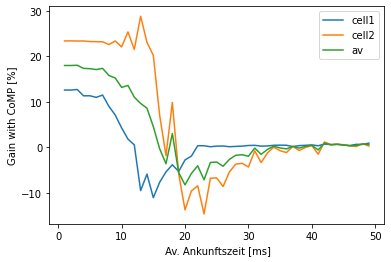

In [41]:
plt.plot(ran,l,label='cell1')
plt.plot(ran,l2,label='cell2')
plt.plot(ran,(l2+l)/2,label='av')
plt.xlabel(' Av. Ankunftszeit [ms]')
plt.ylabel('Gain with CoMP [%]')
plt.legend(loc='upper right')


In [49]:
df[df['PCI Serving']==133]

,PCI Serving,PCI Coord,JT_1 SINR [dB],JT_2 SINR [dB],usage,id
27,133,320,2.405651,6.717764,0.0,27
29,133,775,-1.563275,4.954945,0.0,29
30,133,320,2.778218,8.049792,0.0,30
32,133,775,-4.056027,2.259653,0.0,32
43,133,320,2.487849,7.591798,0.0,43
57,133,775,-1.621674,4.865466,0.0,57
58,133,320,2.495852,7.604191,0.0,58
61,133,320,1.956370,7.661257,0.0,61
67,133,319,-3.160994,2.692068,0.0,67
74,133,319,-2.269692,3.148593,0.0,74


In [44]:
sinr2

-19.191548656731307

Text(0, 0.5, 'Gain with CoMP [%]')

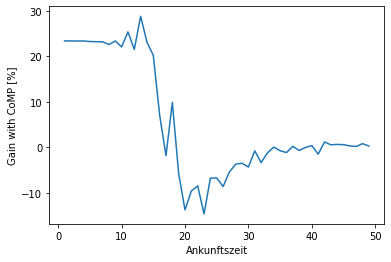

In [33]:
plt.plot(ran,l2)
plt.xlabel('Ankunftszeit')
plt.ylabel('Gain with CoMP [%]')

Text(0, 0.5, 'Gain with CoMP [%]')

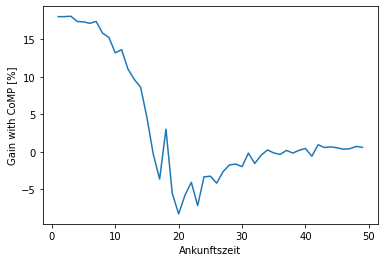

In [34]:
plt.plot(ran,(l+l2)/2)
plt.xlabel('Ankunftszeit')
plt.ylabel('Gain with CoMP [%]')